In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
import glob
import sys
sys.path.append('../')
from package_global_functions import *

def get_avg_traj(dfs):
    df_avg = reduce(lambda a,b: a.add(b, fill_value=0), dfs)
    df_avg = df_avg/len(dfs)
    return df_avg

path_kb_data = '../../kilobot_experiments_data/BeesModel_N=35_ordered'

### Read, avg  and plot some evolutions:

In [13]:
filep1 = 'BeesModel_N=35_deltat=0800_f0static_p1=30_p2=30_q1=07_q2=10_lambda=00_rep=01-results.csv'
df1 = pd.read_csv(f'{path_kb_data}/{filep1}')
filep2 = 'BeesModel_N=35_deltat=0800_f0static_p1=30_p2=30_q1=07_q2=10_lambda=00_rep=02-results.csv'
df2 = pd.read_csv(f'{path_kb_data}/{filep2}')

for df in [df1, df2]:
    df['sum'] = df['R'] + df['G'] + df['B']
    df['f2'] = df['B']/df['sum']
    df['f1'] = df['G']/df['sum']
    df['f0'] = df['R']/df['sum']
    df = df.drop(labels=['file', 'R', 'G', 'B', 'correct', 'sum'], axis=1, inplace=True)

dfavg = get_avg_traj([df1, df2])
print(len(df1), len(df2), len(dfavg))
fig, ax = plt.subplots()
cicles = np.arange(1,len(df1)+1,1)
ax.plot(cicles, df1['f2'], lw=0.8, color='xkcd:blue')
ax.plot(cicles, df2['f2'], lw=0.8, color='xkcd:blue', ls=':')
ax.plot(cicles, dfavg['f2'], lw=0.8, color='xkcd:blue', ls='--')


### Identify files and save to a dataframe

In [102]:
files = glob.glob(f'{path_kb_data}/*.csv')

ls = []
pi1s = []
pi2s = []

for file in files:
    pi1int = int(file.split('_')[8].split('=')[1])
    pi2int = int(file.split('_')[9].split('=')[1])
    lint = int(file.split('_')[12].split('=')[1])
    # print(pi1int, pi2int, lint)  
    pi1s.append(pi1int), pi2s.append(pi2int), ls.append(lint)

df = pd.DataFrame({'file':files, 'lamb':ls, 'pi1':pi1s, 'pi2':pi2s})

df.to_csv('files_kb_N_35.csv', index=False)

In [118]:
pi_pairs = [(30, 30), (40, 20)]
lambs = [0, 30, 60, 90]
# lambs = [0, ]
states_df = {'pi1':[], 'pi2':[], 'lamb':[]} # 'Qavg':[]
states_ids = ['Qf2', 'qf2', 'draw', 'qf1', 'Qf1']
for sid in states_ids:
    states_df[sid] = []

dffiles = pd.read_csv('files_kb_N_35.csv')

for pi_pair in pi_pairs:
    pi1, pi2 = pi_pair
    for l in lambs:
        states = [0, 0, 0, 0, 0] # [f2 > 2*f1, f2 > f1, f2 == f2, f1 > f2, f1 > 2*f2]
        prevsum = 0
        Qavg = 0
        dfa = dffiles.query('lamb == @l & pi1 == @pi1 & pi2 == @pi2')
        for f in dfa['file']:
            dfi = pd.read_csv(f)
            if (len(dfi) < 100):
                print(f)
            dfi['sum'] = dfi['R'] + dfi['G'] + dfi['B']
            dfi['f2'] = dfi['B']/dfi['sum']
            dfi['f1'] = dfi['G']/dfi['sum']
            dfi['f0'] = dfi['R']/dfi['sum']
            dfi['Q'] = dfi['f2'] - 2*dfi['f1']
            dfi = dfi.drop(labels=['file', 'R', 'G', 'B', 'correct', 'sum'], axis=1)
            for row in dfi[50:].itertuples():
                f2, f1 = row[1], row[2]
                if f2 > 2*f1:
                    states[0] += 1
                elif f2 > f1:
                    states[1] += 1
                elif f2 == f1:
                    states[2] += 1
                elif f1 > 2*f1:
                    states[4] += 1
                elif f1 > f2:
                    states[3] += 1
            # if len(dfi[50:]) == (sum(states) - prevsum):
            #     # continue
            #     print('godood')
            # else:
            #     print('errorrrr')
            #     print(len(dfi[50:]), sum(states)-prevsum)
            if not len(dfi[50:]) == (sum(states) - prevsum):
                print('errorrrr')
            prevsum = sum(states)
            # Qavg += np.average(dfi[50:]['Q'])
        # Qavg = Qavg/len(dfa)
        states_df['pi1'].append(pi_pair[0]), states_df['pi2'].append(pi_pair[1]), states_df['lamb'].append(l) #, states_df['Qavg'].append(Qavg)
        for i,sid in enumerate(states_ids):
            states_df[sid].append(states[i])

states_df = pd.DataFrame(states_df)
states_df.to_csv('files_kb_N_35_states.csv', index=False)
    

../../kilobot_experiments_data/BeesModel_N=35_ordered/BeesModel_N=35_deltat=0800_f0static_p1=30_p2=30_q1=07_q2=10_lambda=30_rep=02-results.csv
../../kilobot_experiments_data/BeesModel_N=35_ordered/BeesModel_N=35_deltat=0800_f0static_p1=30_p2=30_q1=07_q2=10_lambda=90_rep=03-results.csv


([<matplotlib.patches.Wedge at 0x1f45a0bd0>,
 [Text(-0.8044062539808373, 0.7502869974593168, '$f_2 > 2f_1$'),
  Text(0.666742030745713, -0.8749028885751167, '$f_2 > f_1$'),
  Text(1.0413299145865063, -0.35444605934790663, '$f_2 = f_1$'),
  Text(1.0861129093341408, -0.1742376198693281, '$f_1 > f_2$'),
  Text(1.0999999999999792, 2.1402491494329463e-07, '$f_2 > 2 f_1$')],
 [Text(-0.43876704762591123, 0.4092474531596273, '76.1%'),
  Text(0.36367747131584344, -0.477219757404609, '18.5%'),
  Text(0.5679981352290033, -0.19333421418976723, '0.3%'),
  Text(0.5924252232731677, -0.09503870174690622, '5.1%'),
  Text(0.5999999999999887, 1.1674086269634252e-07, '0.0%')])

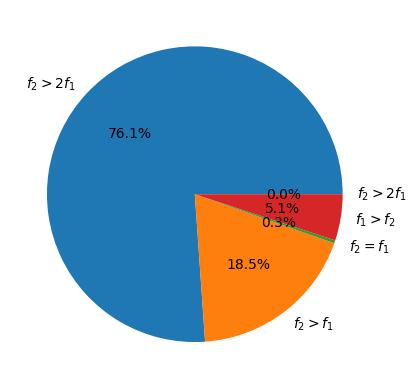

In [117]:
labels = ['$f_2 > 2f_1$', '$f_2 > f_1$', '$f_2 = f_1$', '$f_1 > f_2$', '$f_2 > 2 f_1$']
fig, ax = plt.subplots()
ax.pie(states, labels=labels, autopct='%1.1f%%')

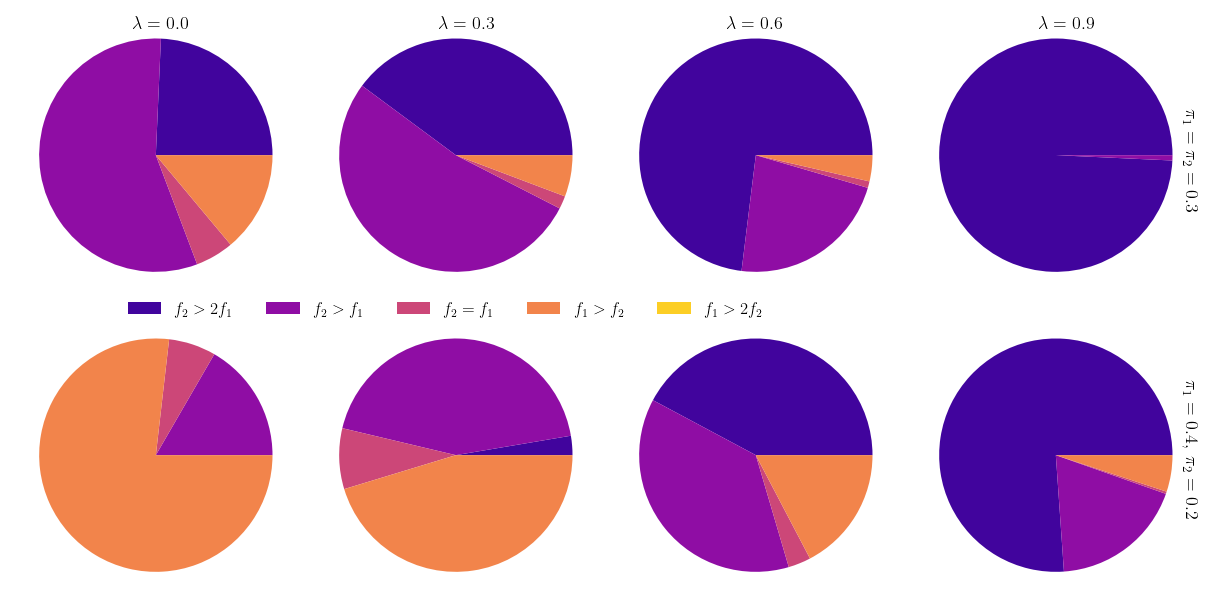

In [146]:
latexFont(titlesize=11, ticklabelssize=11, labelsize=13, legendsize=12)

fig, ax = plt.subplots(2,4, figsize=(12,6), constrained_layout=True)

states_ids = ['Qf2', 'qf2', 'draw', 'qf1', 'Qf1']

labels = ['$f_2 > 2f_1$', '$f_2 > f_1$', '$f_2 = f_1$', '$f_1 > f_2$', '$f_1 > 2 f_2$']
# colors = plt.cm.Pastel1(np.linspace(0, 1, len(labels)))
colors = plt.cm.plasma(np.linspace(0.1, 0.9, len(labels)))

# colors = ['xkcd:bright blue', 'xkcd:sky blue', 'xkcd:gray', 'xkcd:light green', 'xkcd:emerald green']
# colors = ['xkcd:dodger blue', 'xkcd:pastel blue', 'xkcd:gray', 'xkcd:pastel green', 'xkcd:dark pastel green']

df_states = pd.read_csv('files_kb_N_35_states.csv')

for i,pi_pair in enumerate([(30, 30), (40, 20)]):
    pi1, pi2 = pi_pair
    for j,l in enumerate([0, 30, 60, 90]):
        dfa = df_states.query('lamb == @l & pi1 == @pi1 & pi2 == @pi2')
        states = [int(dfa[sid].iloc[0]) for sid in states_ids]
        # ax[i,j].pie(states, labels=labels, colors=colors, autopct='%1.1f%%')
        if i == 0 and j == 0:
            # wedges, text, autotexts = ax[i,j].pie(states, colors=colors, autopct='%1.1f%%')
            wedges, text = ax[i,j].pie(states, colors=colors)
        else:
            ax[i,j].pie(states, colors=colors)
        # if i == 0:
        #     ax[i,j].set_title(f'$\lambda = {l/100}$')

fig.legend(wedges, labels, loc=(0.1, 0.47), ncol=5, frameon=False)
# ax[0,0].text(0.5, 1.0, '$\lambda = 0.0$', transform=ax[0,0].transAxes)
fig.text(0.105, 0.96, '$\lambda = 0.0$', fontsize=13)
fig.text(0.36, 0.96, '$\lambda = 0.3$', fontsize=13)
fig.text(0.60, 0.96, '$\lambda = 0.6$', fontsize=13)
fig.text(0.86, 0.96, '$\lambda = 0.9$', fontsize=13)

fig.text(0.98, 0.66, f'$\pi_1 = \pi_2 = 0.3$', fontsize=13, rotation=270)
fig.text(0.98, 0.15, f'$\pi_1 = 0.4, \; \pi_2 = 0.2$', fontsize=13, rotation=270)        

fig.savefig('pie_charts_different_states_kb_N_35_stationary.pdf')